# Topicos Avanzados de Inteligencia Artificial
### Instructor: Dr. Luis Felipe Marín Urías
### Facultad de ingeniería Eléctrica y Electrónica
### Universidad Veracruzana

## Sonido: identificando comandos de voz (simple) 

El sonido es una señal y la podemos ver de dos formas: en el espacio temporal y en el frecuencial.
Para leer un archivo de sonido debemos usar unas bibliotecas que nos faciliten su lectura.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import wavfile as wav
from scipy import signal

In [2]:
rate, data = wav.read('./files/okay-1.wav')

In [3]:
data

array([[ 16,  16],
       [ 12,  12],
       [-11, -11],
       ...,
       [  0,   0],
       [  0,   0],
       [  0,   0]], dtype=int16)

In [4]:
rate

44100

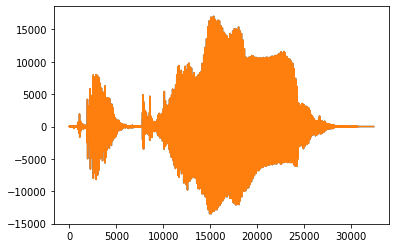

In [5]:
plt.plot(data)

El texto dice Okay y podemos ver en el eje X el tiempo y en el Eje Y la aplitud del sonido.
No es la única forma de leer un archivo de sonido pero es una de las mas simples.

In [6]:
from IPython.core.display import HTML
def wavPlayer(filepath):    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))
    
wavPlayer('./files/okay-1.wav')

La pregunta aquí es, como podemos decir que el sonido es un "okay" o es otra palabra como "no", o aún más como un "okay" pronunciado de manera diferente.

In [9]:
rate2, okay2 = wav.read('./files/okay-1.wav')
rate3, okay3 = wav.read('./files/okay-4.wav')
rate4, okay4 = wav.read('./files/okay-5.wav')
rate5, okay5 = wav.read('./files/okay-7.wav')
rate6, okay6 = wav.read('./files/okay-6.wav')
okay1 = data

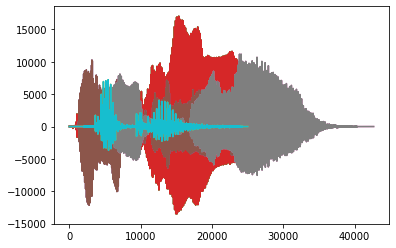

In [8]:
plt.plot(okay1)
plt.plot(okay2)
plt.plot(okay3)
plt.plot(okay4)
plt.plot(okay5)
#plt.plot(okay6)


como se puede observar en el plot anterior, en el espacio temporal se vuelve muy complicado lograr comparar las palabras, aunque se trate de la misma, esto se debe a que las personas pueden hablar diferente o pronunciar diferente para darle un significado diferente. Muchas variables intervienen en la definición de una palabra y esto afecta mucho en el espacio temporal.

## Cambio de dominio del temporal al Frecuencial FFT


Para poder identificar que frecuencias están presentes en nuestro sonido lo primero que debemos hacer es pasar del dominio del tiempo al dominio frecuencial, y esto se hace con la famos FFT o Fast Fourier Transform (transformada rápida de fourier) que es una versión discreta y finita de la transformada de fourier.

In [9]:
# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal
¢¢∞#
# signal information
freq = 100 # in hertz, the desired natural frequency
#omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T


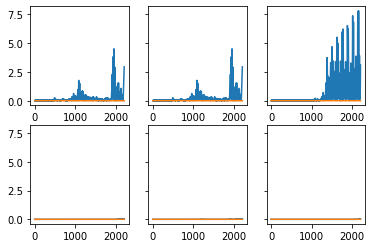

In [10]:
def pasar_a_dominio_de_frecuencia(senial):
    # fourier transform and frequency domain
    #Y_k = fft(senial) # puede ser esta función 
    Y_k = np.fft.fft(senial)[0:int(N/2)]/N # o est Funcion FFT de numpy de la cual sólo necesitamos un sector y su intensidad
    Y_k[1:] = 2*Y_k[1:] # Duplicamos el vector para darle mas tamaño
    
    Pxx = np.abs(Y_k) # eliminamos toda la parte imaginaria

    f = Fs*np.arange((N/2))/N; # generamos vector de frecuencias
    return f, Pxx

f,  Pxx  = pasar_a_dominio_de_frecuencia(okay1)
f2, Pxx2 = pasar_a_dominio_de_frecuencia(okay2)
f3, Pxx3 = pasar_a_dominio_de_frecuencia(okay3)
f4, Pxx4 = pasar_a_dominio_de_frecuencia(okay4)
f5, Pxx5 = pasar_a_dominio_de_frecuencia(okay5)
f6, Pxx6 = pasar_a_dominio_de_frecuencia(okay6)
# plotting

fig,ax = plt.subplots(2,3,sharey=True)

ax[0][0].plot(Pxx)
ax[0][1].plot(Pxx2)
ax[0][2].plot(Pxx3)
ax[1][0].plot(Pxx4)
ax[1][1].plot(Pxx5)
ax[1][2].plot(Pxx6)



Como podemos ver, si graficamos todos en la misma escala hay 3 sonidos que no podemos visualizar pero que si tienen datos como lo podemos observar en la figura de abajo.

Text(0.5, 0, 'Frequency')

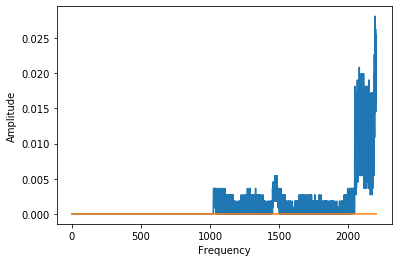

In [11]:
plt.plot(Pxx4)

plt.ylabel('Amplitude')
plt.xlabel('Frequency')

Por lo que graficaremos todos en escala logaritmica para poderlos observar.

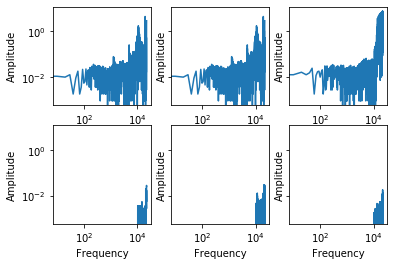

In [12]:
fig,ax = plt.subplots(2,3,sharey=True)

ax[0][0].plot(f,Pxx)
ax[0][1].plot(f2,Pxx2)
ax[0][2].plot(f3,Pxx3)
ax[1][0].plot(f4,Pxx4)
ax[1][1].plot(f5,Pxx5)
ax[1][2].plot(f6,Pxx6)
for a in ax:
    for p in a:
        p.set_xscale('log')
        p.set_yscale('log')
        p.set_xlabel('Frequency')
        p.set_ylabel('Amplitude')

Como podemos observar f y f2 son idénticos puesto que son el mismo archivo, y si lo comparamos con f3 podemos observar que se parecen.

Text(0.5, 0, 'Frequency')

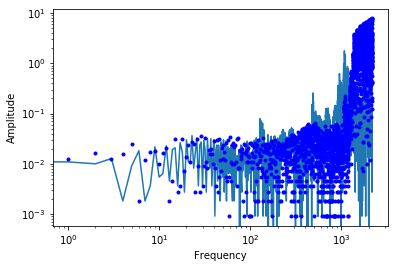

In [13]:
plt.plot(Pxx)
plt.plot(Pxx3,'b.')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')

## Diferencia de histogramas

La manera que podríamos ver si los histogramas se parecen viendo que tanta distancia hay entre los dos.

Podemos ver un histograma de diferencia directa, restando un elemento i de histograma_1 menos el elemento i del histograma_2 siempre y cuando los histogramas tengan la misma longitud.

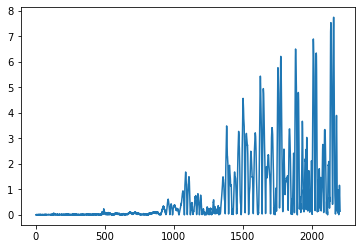

In [14]:
plt.plot(np.abs(Pxx.flatten()[::2]-Pxx3.flatten()[::2]))


Si queremos un escalar de la diferencia:

In [15]:
Pxx3_normal = np.abs(Pxx.flatten()[::2]-Pxx3.flatten()[::2])
np.sum(np.abs(Pxx.flatten()[::2]-Pxx3.flatten()[::2]))


1859.2480725623584

Pero no es la forma de obtener la diferencia. 
Primero debemos de poner todos en la misma escala, ya que las palabras usan diferentes tiempos/frecuencias y por eso hay que normalizar la señal.


In [16]:
import cv2
cv2.normalize(Pxx, Pxx,   alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(Pxx2, Pxx2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(Pxx3, Pxx3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(Pxx4, Pxx4, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(Pxx5, Pxx5, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(Pxx6, Pxx6, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       ...,
       [0.1 , 0.  ],
       [0.3 , 0.  ],
       [0.65, 0.  ]])

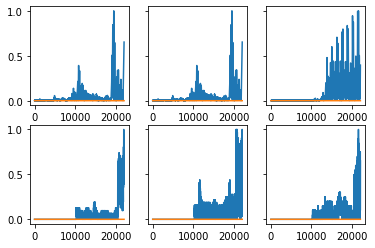

In [17]:
fig,ax = plt.subplots(2,3,sharey=True)

ax[0][0].plot(f,Pxx)
ax[0][1].plot(f2,Pxx2)
ax[0][2].plot(f3,Pxx3)
ax[1][0].plot(f4,Pxx4)
ax[1][1].plot(f5,Pxx5)
ax[1][2].plot(f6,Pxx6)

Una vez normalizado se puede obtener distancias de diferentes maneras, de las cuales 4 son las mas usadas en histogramas (pero no son las únicas):
 - chi cuadrada.
 - correlación.
 - intersección.
 - Bhattacharyya.
 
 Consultar las fórmulas:
     https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html

In [18]:
import math
def chi_square(h1,h2):
    return sum(np.divide(np.power(h1-h2,2),h1,out=np.zeros_like(h1), where=h1!=0))
    #out=np.zeros_like(a), where=b!=0
    #sum(np.power(h1-h2,2))
def correlacion(h1,h2):
    promh1 = np.mean(h1)
    promh2 = np.mean(h2)
    x1 = h1-promh1
    x2 = h2-promh2
    fact1 = sum((x1)*(x2))
    fact2 = np.sqrt(abs(sum(x1*x1) * sum(x2*x2)))
    return fact1/fact2
def intersection(h1,h2):
    return sum(np.minimum(h1,h2))
def Bhattacharyya(h1,h2):
    N=len(h1)
    N2=N*N
    promh1 = np.mean(h1)
    promh2 = np.mean(h2)   
    sumatoria=sum(np.sqrt(abs(h1*h2)))
    return(np.sqrt(abs(1-(1/np.sqrt(abs(promh1*promh2*N2)))*sumatoria)))#formula opencv
    #return -1*np.log(sum(np.sqrt(h1*h2)))#formula original

Hacemos una lista con las combinaciones de todas las distancias entre los histogramas de las palabras "OK"

In [19]:
P1=Pxx.flatten()[::2]
P2=Pxx2.flatten()[::2]
P3=Pxx3.flatten()[::2]
P4=Pxx4.flatten()[::2]
P5=Pxx5.flatten()[::2]
P6=Pxx6.flatten()[::2]

oks=[P2,P3,P4,P5,P6] #RECORDAR QUE P1 Y P2 ES EL MISMO ARCHIVO
distances=[]


for ok in oks:
    ds=[]
    for ok2 in oks:
        #CHI SQUARE
        d1= chi_square(ok,ok2)
        #Correlacion
        d2 = correlacion(ok,ok2)
        # Interseccion
        d3 = intersection(ok,ok2)
        #Bhattacharyya
        d4= Bhattacharyya(ok,ok2)
        
        ds.append([d1,d2,d3,d4])

    distances.append(ds[:])



Vamos a graficar las distancias de la palabra OK-3 con todos los demás (incluyendose). Pero no los podemos comparar en la misma gráfica puesto que no estan en el mismo rango de valores. La distancia chi-cuadrada regresa valores grandes, mientras que la correlación da valores entre 0 y 1.

(0, 1)

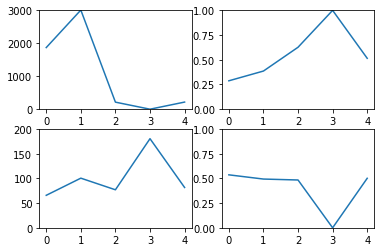

In [20]:
#  [hist1][hist2][metododist] 
#diferencias entre los histogramas con el histograma 3 con diferentes tipos de distancias 
# tipo chi cuadrada
dchi=[distances[0][3][0], distances[1][3][0], distances[2][3][0], distances[3][3][0], distances[4][3][0]]
# tipo correlación
dcorr=[distances[0][3][1], distances[1][3][1], distances[2][3][1], distances[3][3][1], distances[4][3][1]]
# tipo intersección
dinter=[distances[0][3][2], distances[1][3][2], distances[2][3][2], distances[3][3][2], distances[4][3][2]]
# tipo Bhata
dbata=[distances[0][3][3], distances[1][3][3], distances[2][3][3], distances[3][3][3], distances[4][3][3]]

#fig,ax = plt.subplots(2,2,sharey=True)
ax1= plt.subplot(221)
ax1.plot(dchi)
ax1.set_ylim([0,3000])

ax2=plt.subplot(222)
ax2.plot(dcorr)
ax2.set_ylim([0,1])

ax3=plt.subplot(223)
ax3.plot(dinter)
ax3.set_ylim([0,200])

ax4=plt.subplot(224)
ax4.plot(dbata)
ax4.set_ylim([0,1])


Ahora intentaremos comparar los mismos con la palabra NO.

In [21]:
rateno1, No1 = wav.read('./files/no-1.wav')
rateno2, No2 = wav.read('./files/no-2.wav')
rateno3, No3 = wav.read('./files/no-5.wav')
rateno4, No4 = wav.read('./files/no-6.wav')
NoS= [No1, No2, No3, No4]

In [22]:
NoxS=[]
fNx=[]
for i in range(len(NoS)):
    fx_,  Noxx  = pasar_a_dominio_de_frecuencia(NoS[i])
    NoxS.append(Noxx)
    #fNx.append[fx_()]


In [23]:
flattenedNx=[]
for n in NoxS:
    cv2.normalize(n, n, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    flattenedNx.append(n.flatten()[::2])


[1870.4347035763958, 3009.3071667743443, 214.0110057901804, 0.0, 215.95583180414852]
[1870.4347035763958, 3009.3071667743443, 214.0110057901804, 0.0, 215.95583180414852, 540.4368558686733, 583.4307574282084, 1234.2909187174905, 222.5737131847273]


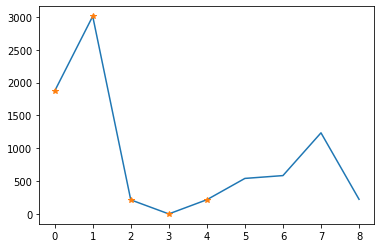

In [24]:
print(dchi)
dchi2=dchi[:]
for no in flattenedNx:
    dchi2.append(chi_square(oks[3],no))
print(dchi2)
plt.plot(dchi2)
plt.plot(dchi,'*')

Como logramos apreciar no hay un umbral de distancia con chi cuadrada que nos permita separar los OK (puntos estrellas) con los No y así en ninguna distancia 

[0.28733383776111043, 0.3860123392926759, 0.6267796828066534, 1.0, 0.5148555655723227]
[0.28733383776111043, 0.3860123392926759, 0.6267796828066534, 1.0, 0.5148555655723227, 0.4376397478538026, 0.43941163565147523, 0.17307798067259633, 0.4273648016282173]


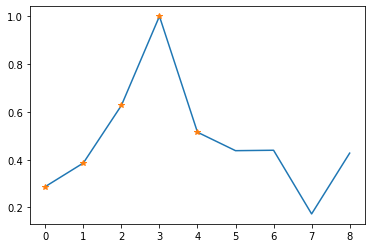

In [25]:
print(dcorr)
dcorr2=dcorr[:]
for no in flattenedNx:
    dcorr2.append(correlacion(oks[3],no))
print(dcorr2)
plt.plot(dcorr2)
plt.plot(dcorr,'*')

[65.73877818035429, 100.44481661241572, 76.92842741935482, 180.34375, 81.58749999999982]
[65.73877818035429, 100.44481661241572, 76.92842741935482, 180.34375, 81.58749999999982, 95.42629716981132, 129.58701616121303, 142.7048611111111, 58.33928571428578]


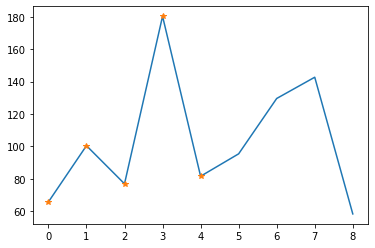

In [26]:
print(dinter)
dinter2=dinter[:]
for no in flattenedNx:
    dinter2.append(intersection(oks[3],no))
print(dinter2)
plt.plot(dinter2)
plt.plot(dinter,'*')

[0.5358649500971953, 0.49315884438409596, 0.48369519771965575, 0.0, 0.5008811029539114]
[0.5358649500971953, 0.49315884438409596, 0.48369519771965575, 0.0, 0.5008811029539114, 0.516151096060698, 0.5229094934115438, 0.6002962110369361, 0.632017873323578]


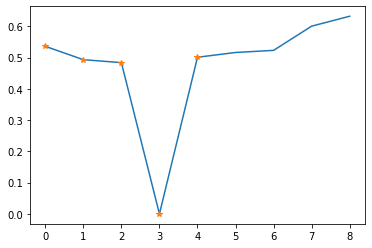

In [27]:
print(dbata)
dbata2=dbata[:]
for no in flattenedNx:
    dbata2.append(Bhattacharyya(oks[3],no))
print(dbata2)
plt.plot(dbata2)
plt.plot(dbata,'*')

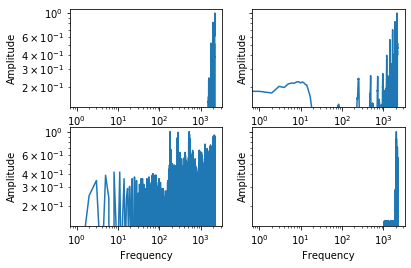

In [28]:
fig,ax = plt.subplots(2,2,sharey=True)

ax[0][0].plot(NoxS[0])
ax[0][1].plot(NoxS[1])
ax[1][0].plot(NoxS[2])
ax[1][1].plot(NoxS[3])
for a in ax:
    for p in a:
        p.set_xscale('log')
        p.set_yscale('log')
        p.set_xlabel('Frequency')
        p.set_ylabel('Amplitude')


## Features


Como podemos apreciar, no es posible distinguir entre un histograma y otro eso es por que las frecuencias llevan más a distinguir las notas o tonos que las palabras, una misma palabra puede estar dicha en diferente frecuencia probablemente podríamos distinguir las palabras de una sola persona.

Entonces procederemos a obtener datos estadísticos que nos proporcionen información de como se dice una palabra. y empezaremos por determinar la media y STD de cada palabra, y graficaremos en X el valor de la media y en Y el de la STD.

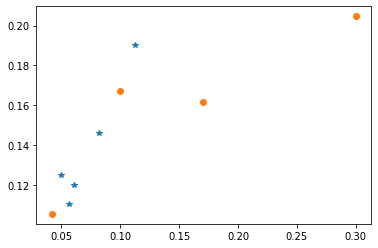

In [29]:
featuresMean =list(map(lambda x:np.mean(x),oks))
featuresSTD  =list(map(lambda x:np.std(x),oks))
features2Mean=list(map(lambda x:np.mean(x),flattenedNx))
features2STD =list(map(lambda x:np.std(x),flattenedNx))

plt.plot(featuresMean, featuresSTD,  "*")
plt.plot(features2Mean,features2STD, "o")
    

Arriba podemos observar que las estrellas ("OK") y los círculos("NO") están mezclados. Aunque por otro lado si se pueden ver ciertas tendencias de agrupación de los la clase estrella entre ellas, probablemente se trate de que la señal está contaminada con ruido.

## Filtrado

Muchas veces el no poder distinguir entre uno y otro es porque no filtramos nuestra señal del ruido que se puede encontrar presente en nuestra señal, en este caso un sonido. El ruido puede ser inducido por el mismo sensor, el micrófono en nuestro caso.

Los filtros son funciones que nos ayudan a modelar el ruido y de esta misma manera hacer algo para suprimirlo o al menos minimizarlo para que no interfiera con su reconocimiento.

Hay muchos tipos de filtros pero los más usados para nuestros fines son:

- gaussiano
- pasa bajas
- pasa altas
- pasa bandas
- tipo notch

en donde se definen umbrales entre los cuales establecemos las frecuencias que queremos analizar.


### Filtrado Gaussiano

El filtro gaussiano supone que todo ruido en una señal puede representarse como una sinusoide por lo que también debe poderse eliminar aplicando una convolución con una campana de gauss.

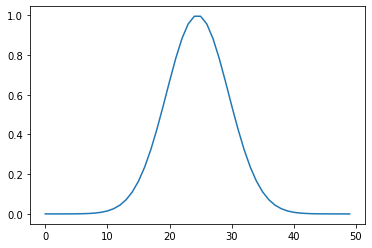

In [30]:
kernel = signal.gaussian(50, std=5)
plt.plot(kernel)

El proceso entonces consistirá en poder aplicar el filtro antes de pasar al dominio frecuencial, suavizando así la señal eliminando ruido indeseado.
En el el siguiente código se presenta el procedimiento general del filtrado, y mostramos paso a paso lo que sucede con la señal una vez aplicando la convolución con el kernel.
En la gráfica podemos apreciar la diferencia entre las dos señales.

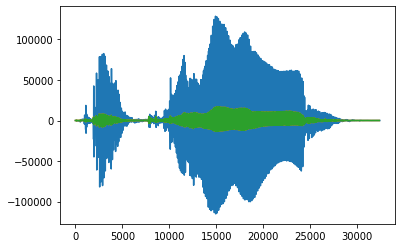

In [31]:
def gaussfilter(kern, senial):
    senialfiltrada=np.convolve(kern,senial)
    f_g, Pg=pasar_a_dominio_de_frecuencia(senialfiltrada)
    cv2.normalize(Pg, Pg,   alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    return f_g, Pg #.flatten()[::2]



filtradoG=np.convolve(kernel,okay1.flatten()[::2])

plt.plot(filtradoG)
plt.plot(okay1)

Posteriormente pasamos al dominio frecuencial y normalizamos para su comparación con los demás. En la gráfica podemos comparar el antes en naranja y el despúes en azul.

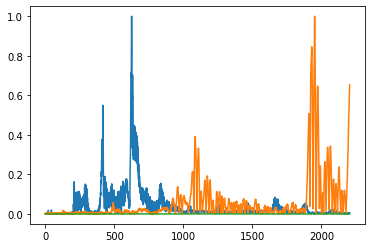

In [32]:
f_g, Pxx_g = pasar_a_dominio_de_frecuencia(filtradoG)
cv2.normalize(Pxx_g, Pxx_g,   alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
plt.plot(Pxx_g)
plt.plot(Pxx)


Ahora aplicamos lo mismo para todas las palabras "Okay" y podemos compararlas con la original.

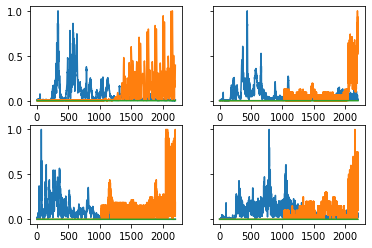

In [33]:
f3_g, Pxx3_g = gaussfilter(kernel, okay3.flatten()[::2])
f4_g, Pxx4_g=gaussfilter(kernel,okay4.flatten()[::2])
f5_g, Pxx5_g=gaussfilter(kernel,okay5.flatten()[::2])
f6_g, Pxx6_g=gaussfilter(kernel,okay6.flatten()[::2])


fig,ax = plt.subplots(2,2,sharey=True)

ax[0][0].plot(Pxx3_g)
ax[0][0].plot(Pxx3)
ax[0][1].plot(Pxx4_g)
ax[0][1].plot(Pxx4)
ax[1][0].plot(Pxx5_g)
ax[1][0].plot(Pxx5)
ax[1][1].plot(Pxx6_g)
ax[1][1].plot(Pxx6)


Finalmente podemos realizar de nuevo el procedimiento de extracción de características. y comparar entre las 2 palabras.

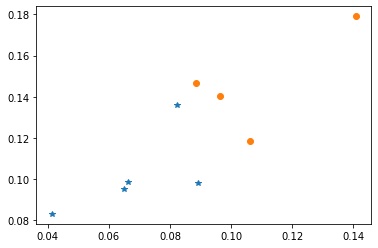

In [34]:
OkxG=[Pxx_g,Pxx3_g,Pxx4_g,Pxx5_g,Pxx6_g]
NoxG=[]
for no in NoS:
    fn_g, noxx_g = gaussfilter(kernel,no.flatten()[::2])
    NoxG.append(noxx_g[:])
    
featuresMean =list(map(lambda x:np.mean(x),OkxG))
featuresSTD  =list(map(lambda x:np.std(x),OkxG))
features2Mean=list(map(lambda x:np.mean(x),NoxG))
features2STD =list(map(lambda x:np.std(x),NoxG))

plt.plot(featuresMean, featuresSTD,  "*")
plt.plot(features2Mean,features2STD, "o")

 Ahora podemos observar que hay una separabilidad más clara entre las características de las 2 palabras, las cuales resultan linealmente separables.
 

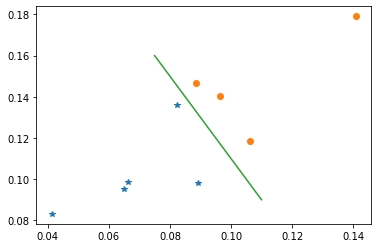

In [35]:
xs=[0.075,0.11]
ys=[0.16,0.09]
plt.plot(featuresMean, featuresSTD,  "*")
plt.plot(features2Mean,features2STD, "o")
plt.plot(xs,ys, "-")

Se puede seguir haciendo experimentos modificando el valor de sigma y del tamaño de muestreo en el kernel, en otras palabras modificando el tamaño y grosor de la campana de Gauss.

(0, 1)

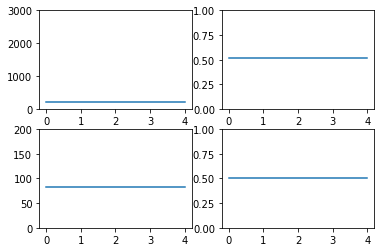

In [36]:
distancesg=[]

for ok in OkxG:
    dsg=[]
    for ok2 in OkxG:
        #CHI SQUARE
        d1= chi_square(ok,ok2)
        #Correlacion
        d2 = correlacion(ok,ok2)
        # Interseccion
        d3 = intersection(ok,ok2)
        #Bhattacharyya
        d4= Bhattacharyya(ok,ok2)
        
        dsg.append([d1,d2,d3,d4])

    distancesg.append(ds[:])

dchig=[distancesg[0][3][0], distancesg[1][3][0], distancesg[2][3][0], distancesg[3][3][0], distancesg[4][3][0]]
# tipo correlación
dcorrg=[distancesg[0][3][1], distancesg[1][3][1], distancesg[2][3][1], distancesg[3][3][1], distancesg[4][3][1]]
# tipo intersección
dinterg=[distancesg[0][3][2], distancesg[1][3][2], distancesg[2][3][2], distancesg[3][3][2], distancesg[4][3][2]]
# tipo Bhata
dbatag=[distancesg[0][3][3], distancesg[1][3][3], distancesg[2][3][3], distancesg[3][3][3], distancesg[4][3][3]]

#fig,ax = plt.subplots(2,2,sharey=True)
ax1= plt.subplot(221)
ax1.plot(dchig)
ax1.set_ylim([0,3000])

ax2=plt.subplot(222)
ax2.plot(dcorrg)
ax2.set_ylim([0,1])

ax3=plt.subplot(223)
ax3.plot(dinterg)
ax3.set_ylim([0,200])

ax4=plt.subplot(224)
ax4.plot(dbatag)
ax4.set_ylim([0,1])



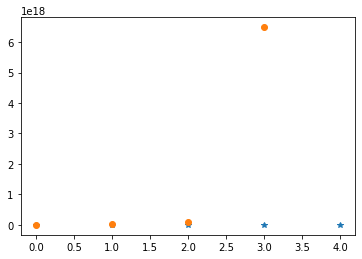

In [37]:
dchig2=[]
for no in NoxG:
    dchig2.append(chi_square(OkxG[3],no))
plt.plot(dchig,'*')
plt.plot(dchig2,'o')

la distancia Chi-cuadrada no se ve claramente una separabilidad, pero intentemos las otras.

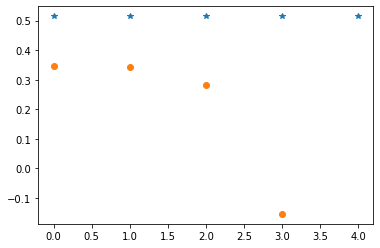

In [38]:
dcorrg2=[]
for no in NoxG:
    dcorrg2.append(correlacion(OkxG[3],no))
plt.plot(dcorrg,'*')
plt.plot(dcorrg2,'o')

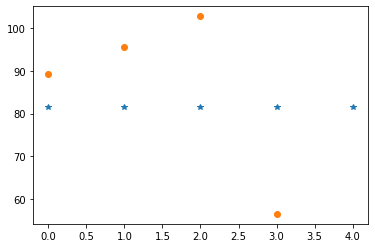

In [39]:
dinterg2=[]
for no in NoxG:
    dinterg2.append(intersection(OkxG[3],no))
plt.plot(dinterg,'*')
plt.plot(dinterg2,'o')

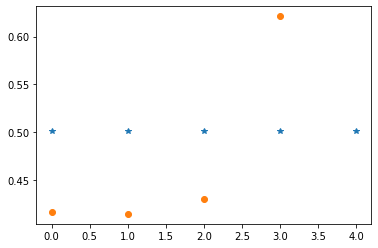

In [40]:
dbatag2=[]
for no in NoxG:
    dbatag2.append(Bhattacharyya(OkxG[3],no))
plt.plot(dbatag,'*')
plt.plot(dbatag2,'o')

## Filtro Adaptativo

El filtro adaptativo consiste más en la información proporcionada por la propia señal, y elimina los elementos de la señal que sean mas grandes que sobrepasen el umbral determinado por una banda definida por la media y desviación estándar.

In [41]:
def adaptive_filter(signal):
    prom = np.mean(signal)
    desv = np.std(signal)
    #print(len(signal))
    #senialfiltrada= list(filter(lambda x: abs(x)<abs(prom-desv), signal))
    senialfiltrada= list(filter(lambda x: x<prom+desv and x>prom-desv, signal))
    #f_g, Pg=pasar_a_dominio_de_frecuencia(senialfiltrada)
    #print (len(senialfiltrada))
    #cv2.normalize(Pg, Pg,   alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    #return f_g, Pg #.flatten()[::2]
    return senialfiltrada

def highpass_adaptive_filter(signal):
    prom = np.mean(signal)
    desv = np.std(signal)
    senialfiltrada= list(filter(lambda x: x<prom+desv, signal))
    return senialfiltrada

def lowpass_adaptive_filter(signal):
    prom = np.mean(signal)
    desv = np.std(signal)
    senialfiltrada= list(filter(lambda x: x>prom-desv, signal))
    return senialfiltrada

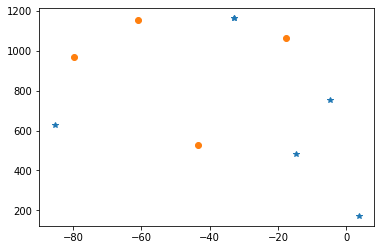

In [42]:
signal1= okay1.flatten()[::2]
signal2= okay2.flatten()[::2]
signal3= okay3.flatten()[::2]
signal4= okay4.flatten()[::2]
signal5= okay5.flatten()[::2]
signal6= okay6.flatten()[::2]
sig_oks=[signal1,signal2,signal3,signal4,signal5, signal6]
sig_nos=[]
for no in NoS:
    sig_nos.append(no.flatten()[::2])
oks_a=[]
oks_ah=[]
oks_al=[]
nos_a=[]
nos_ah=[]
nos_al=[]

for ok in sig_oks:
    oks_a.append(adaptive_filter(ok))
    oks_ah.append(highpass_adaptive_filter(ok))
    oks_al.append(lowpass_adaptive_filter(ok))

for no in sig_nos:
    nos_a.append(adaptive_filter(no))
    nos_ah.append(highpass_adaptive_filter(no))
    nos_al.append(lowpass_adaptive_filter(no))
    
    
featuresMean =list(map(lambda x:np.mean(x),oks_a))
featuresSTD  =list(map(lambda x:np.std(x),oks_a))
features2Mean=list(map(lambda x:np.mean(x),nos_a))
features2STD =list(map(lambda x:np.std(x),nos_a))
#Sin Filtrar
featuresMeanSF =list(map(lambda x:np.mean(x),sig_oks))
featuresSTDSF  =list(map(lambda x:np.std(x),sig_oks))
features2MeanSF=list(map(lambda x:np.mean(x),sig_nos))
features2STDSF =list(map(lambda x:np.std(x),sig_nos))

featuresMeanh =list(map(lambda x:np.mean(x),oks_ah))
featuresSTDh  =list(map(lambda x:np.std(x),oks_ah))
features2Meanh=list(map(lambda x:np.mean(x),nos_ah))
features2STDh =list(map(lambda x:np.std(x),nos_ah))

featuresMeanl =list(map(lambda x:np.mean(x),oks_al))
featuresSTDl  =list(map(lambda x:np.std(x),oks_al))
features2Meanl=list(map(lambda x:np.mean(x),nos_al))
features2STDl =list(map(lambda x:np.std(x),nos_al))

plt.plot(featuresMean, featuresSTD,  "*")
plt.plot(features2Mean,features2STD, "o")




Así se ven sin filtrar.

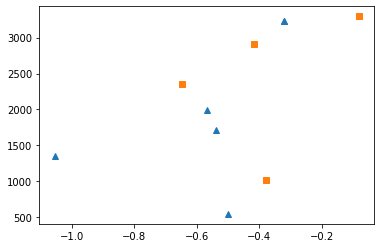

In [43]:
plt.plot(featuresMeanSF, featuresSTDSF,  "^")
plt.plot(features2MeanSF,features2STDSF, "s")

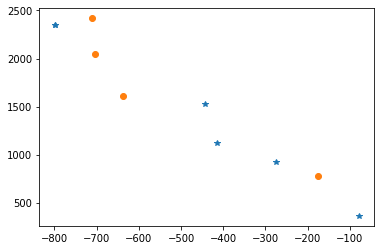

In [44]:
plt.plot(featuresMeanh, featuresSTDh,  "*")
plt.plot(features2Meanh,features2STDh, "o")

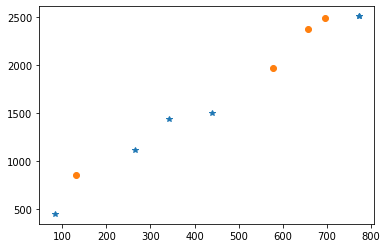

In [45]:
plt.plot(featuresMeanl, featuresSTDl,  "*")
plt.plot(features2Meanl,features2STDl, "o")

# Filtros Pasabajas y Pasaaltas

En ambos filtros se intenta eliminar las frecuencias ya sean altas o bajas, eso es si las palabras están en determinadas frecuencias.

La configuración original es:

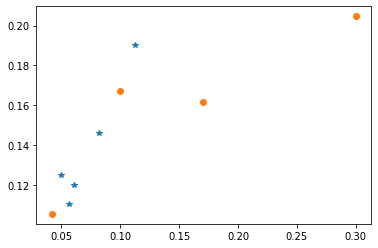

In [46]:
featuresMean =list(map(lambda x:np.mean(x),oks))
featuresSTD  =list(map(lambda x:np.std(x),oks))
features2Mean=list(map(lambda x:np.mean(x),flattenedNx))
features2STD =list(map(lambda x:np.std(x),flattenedNx))

plt.plot(featuresMean, featuresSTD,  "*")
plt.plot(features2Mean,features2STD, "o")

Si pasamos un filtro pasabajas y eliminamos las frecuencias que pertenecen a ciertas frecuencias (1900hz) en este caso.
Probablemente el ruido se encuentre estacionario en determinadas frecuencias, el problema es que al determinar una frecuencia fija nos podemos llevar información importante. En la siguiente gráfica nos muestra que se puede hacer una separación pero una de las palabras es completamente eliminado del grupo.

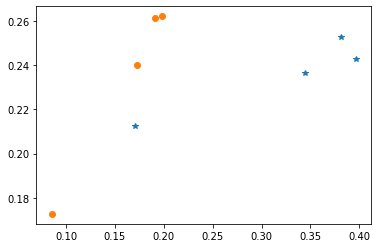

In [47]:
#low pass filter
#eliminacion de frecuencias bajas
def lowpass_histogram(umbral,signal):
    return signal[umbral:]
oks_low=[]
nos_low=[]
for ok in flattenedNx:
    oks_low.append(lowpass_histogram(1900,ok))

for no in NoxS:
    nos_low.append(lowpass_histogram(1900,no))
    

featuresMeanlow =list(map(lambda x:np.mean(x),oks_low))
featuresSTDlow  =list(map(lambda x:np.std(x),oks_low))
features2Meanlow=list(map(lambda x:np.mean(x),nos_low))
features2STDlow =list(map(lambda x:np.std(x),nos_low))

plt.plot(featuresMeanlow, featuresSTDlow,  "*")
plt.plot(features2Meanlow,features2STDlow, "o")


El filtro highpass tiene un efecto similar a lo que sucede en el low pass, eliminando una de las palabras por estar en altas frecuencias.

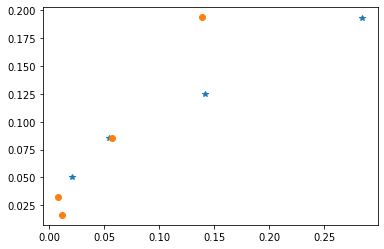

In [48]:
#high pass filter
#eliminacion de frecuencias altas
def highpass_histogram(umbral,signal):
    return signal[:umbral]
oks_high=[]
nos_high=[]
for ok in flattenedNx:
    oks_high.append(highpass_histogram(1900,ok))

for no in NoxS:
    nos_high.append(highpass_histogram(1500,no))
    

featuresMeanhigh =list(map(lambda x:np.mean(x),oks_high))
featuresSTDhigh  =list(map(lambda x:np.std(x),oks_high))
features2Meanhigh=list(map(lambda x:np.mean(x),nos_high))
features2STDhigh =list(map(lambda x:np.std(x),nos_high))

plt.plot(featuresMeanhigh, featuresSTDhigh,  "*")
plt.plot(features2Meanhigh,features2STDhigh, "o")


Finalmente un bandpass filter que elimina tanto altas como bajas:

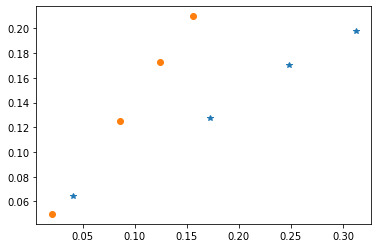

In [49]:
#band pass filter
#eliminación de frecuencias en una banda
def bandpass_histogram(umbralalto, umbralbajo,signal):
    return signal[umbralbajo:umbralalto]
oks_band=[]
nos_band=[]
for ok in flattenedNx:
    oks_band.append(bandpass_histogram(1900,1500,ok))

for no in NoxS:
    nos_band.append(bandpass_histogram(1900,1500,no))
    

featuresMeanB =list(map(lambda x:np.mean(x),oks_band))
featuresSTDB  =list(map(lambda x:np.std(x),oks_band))
features2MeanB=list(map(lambda x:np.mean(x),nos_band))
features2STDB =list(map(lambda x:np.std(x),nos_band))

plt.plot(featuresMeanB, featuresSTDB,  "*")
plt.plot(features2MeanB,features2STDB, "o")


## Challenge

Con lo anterior podemos determinar que ya hay una distancia que podemos utilizar para determinar si es una palabra u otra, la práctica a partir de aquí es:

1. De los filtros mencionados, determinar cual(es) nos conviene utilizar más para determinar una palabra.
2. En una tarjeta Raspberry Pi (o similar) hacer un programa de domótica que controle funciones básicas en una casa, utilizando estas técnicas.